In [11]:
%matplotlib inline
import quandl
import pandas
import matplotlib.pyplot as plt

In [3]:
quandl.ApiConfig.api_key = 'ZFn4BxELfJewkfKJsQ8f'

In [41]:
tesla = quandl.get('WIKI/TSLA')

In [42]:
gm = quandl.get('WIKI/GM')

In [9]:
gm.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


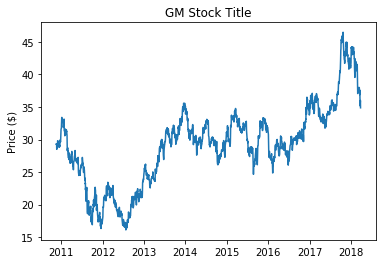

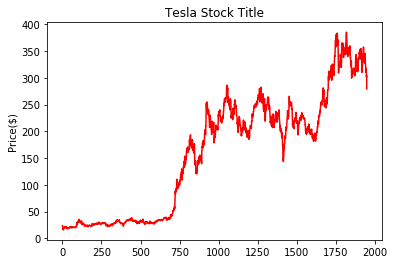

In [28]:
plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM Stock Title')
plt.ylabel('Price ($)')
plt.show()

plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock Title')
plt.ylabel('Price($)')
plt.show()

In [43]:
# Yearly average number of shares outstanding for Tesla and GM
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}

In [ ]:
tesla.year = tesla.index.year
gm.year = gm.index.year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name=u'Date', length=1849)

In [45]:
tesla.reset_index(level=0, inplace=True)
tesla.cap = 0
gm.reset_index(level=0, inplace=True)
gm.cap = 0

In [46]:
for i, year in enumerate(tesla.year):
    shares = tesla_shares.get(year)
    tesla.loc[i, 'cap'] = shares * tesla.loc[i, 'Adj. Close']

In [47]:
for i, year in enumerate(gm.year):
    shares = gm_shares.get(year)
    gm.loc[i, 'cap'] = shares * gm.loc[i, 'Adj. Close']

In [49]:
cars = gm.merge(tesla, on='Date', how='inner')

In [52]:
cars.rename(columns={'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)

In [53]:
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9

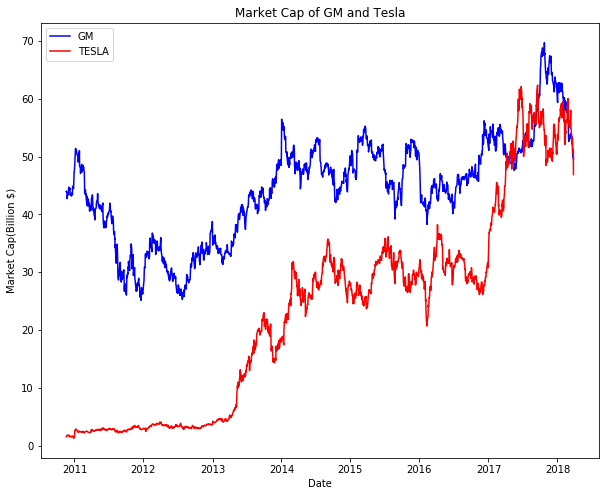

In [64]:
plt.figure(figsize=(10,8))
plt.plot(cars['Date'], cars['gm_cap'], 'b-', label='GM')
plt.plot(cars['Date'], cars['tesla_cap'], 'r-', label='TESLA')
plt.xlabel('Date'); plt.ylabel('Market Cap(Billion $)')
plt.title('Market Cap of GM and Tesla')
plt.legend()

In [65]:
import numpy as np

In [ ]:
first_date = cars.loc[np.min(list(np.where(cars.tesla_cap > cars.gm_cap)))]

In [78]:
first_date = cars.loc[np.min(list(np.where(cars.tesla_cap > cars.gm_cap))), 'Date']
last_date = cars.loc[np.max(list(np.where(cars.tesla_cap > cars.gm_cap))), 'Date']

print 'The first day when tesla overtook gm was on %s and the last day was on %s'%(str(first_date), str(last_date))

The first day when tesla overtook gm was on 2017-04-10 00:00:00 and the last day was on 2018-03-23 00:00:00


In [80]:
import fbprophet

In [82]:
gm = gm.rename(columns={'Date': 'ds', 'cap': 'y'})
gm.y = gm.y / 1e9

In [92]:
tesla = tesla.rename(columns={'Date': 'ds', 'cap': 'y'})
tesla.y = tesla.y / 1e9

In [85]:
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)

In [86]:
gm_prophet.fit(gm)

In [94]:
tesla_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)

In [95]:
tesla_prophet.fit(tesla)

In [89]:
gm_forecast = gm_prophet.make_future_dataframe(periods=365 * 2, freq='D')
gm_forecast = gm_prophet.predict(gm_forecast)

In [97]:
tesla_forecast = tesla_prophet.make_future_dataframe(periods=365 * 2, freq='D')
tesla_forecast = tesla_prophet.predict(gm_forecast)

In [ ]:
gm_prophet.plot(gm_forecast, xlabel='Date', ylabel='Market Cap (Billions $)')
plt.title('Market cap of GM')

Text(0.5,1,'Market cap of Tesla')

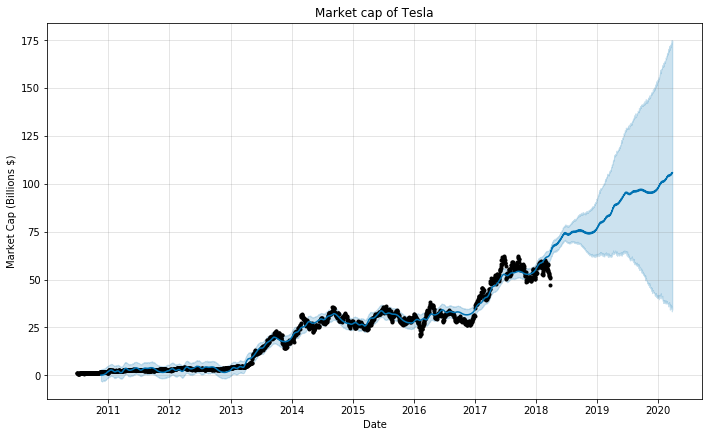

In [98]:
tesla_prophet.plot(tesla_forecast, xlabel='Date', ylabel='Market Cap (Billions $)')
plt.title('Market cap of Tesla')

In [99]:
tesla_prophet.changepoints[:10]

62    2010-09-27
125   2010-12-27
187   2011-03-25
249   2011-06-23
312   2011-09-22
374   2011-12-20
436   2012-03-21
499   2012-06-20
561   2012-09-18
623   2012-12-18
Name: ds, dtype: datetime64[ns]